# **Feature Engineering**

In [1]:
import logging
import pandas as pd
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Import the load_data module
try:
    from data_loader import load_data
    logger_initialized = True
except ImportError as e:
    logger_initialized = False
    print(f"Error importing 'load_data': {e}")

# Set pandas display options for better visibility
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
# Configure logging
def setup_logger(name: str = 'my_logger') -> logging.Logger:
    """
    Set up a logger with INFO level and StreamHandler.
    
    Parameters:
    -----------
    name : str
        The name of the logger.
    
    Returns:
    --------
    logging.Logger
        Configured logger instance.
    """
    logger = logging.getLogger(name)
    logger.setLevel(logging.INFO)
    
    # Prevent duplicate handlers
    if not logger.hasHandlers():
        handler = logging.StreamHandler()
        handler.setLevel(logging.INFO)
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
    
    return logger

# Initialize logger
logger = setup_logger()
logger.info("Imported necessary libraries.")

# Check and log if 'load_data' was successfully imported
if logger_initialized:
    logger.info("'load_data' module imported successfully.")
else:
    logger.warning("'load_data' module could not be imported. Check the 'scripts' directory and file availability.")

2025-01-28 14:42:44,455 - INFO - Imported necessary libraries.
2025-01-28 14:42:44,456 - INFO - 'load_data' module imported successfully.


In [3]:
logger.info("🟢 Starting the data loading process...")
df = load_data('../data/data.csv')
if not df.empty:
    logger.info(f"✅ Data loaded successfully! The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
else:
    logger.warning("⚠️ Data loading completed, but the dataset is empty.")

2025-01-28 14:42:44,466 - INFO - 🟢 Starting the data loading process...
2025-01-28 14:42:44,710 - INFO - ✅ Data loaded successfully! The dataset contains 95662 rows and 15 columns.


Data successfully loaded from '../data/data.csv' with 95662 rows and 15 columns.


In [4]:
# Import the python class for feature engineering
from feature_engineering import FeatureEngineering

# Instantiate the FeatureEngineering class
feature_engineer = FeatureEngineering()

In [5]:
# Identify columns to exclude and categorical columns to encode
cols_to_drop = ['ProductId', 'BatchId', 'AccountId', 'ProviderId', 'SubscriptionId', 'Value', 'CountryCode', 'CurrencyCode']
cat_features = ['ProductCategory', 'ChannelId']

# Drop unnecessary columns
df.drop(columns=cols_to_drop, inplace=True)

In [6]:
if __name__ == '__main__':
    print("🟢 Starting feature engineering process...")
    print("===============================================")

    # Create aggregate features
    df_copy = df.copy().reset_index()
    agg_features = feature_engineer.create_aggregate_features(df_copy)
    print("Aggregate features created.")
    print("===============================================")
    # Extract time features
    df_with_time_features = feature_engineer.extract_time_features(agg_features)
    print("Time features extracted.")
    print("===============================================")
    # Encode categorical features
    df_encoded = feature_engineer.encode_categorical_features(df_with_time_features, cat_features)
    print("Categorical features encoded.")
    print("===============================================")
    # Handle missing values
    df_cleaned = feature_engineer.handle_missing_values(df_encoded)
    print("Missing values handled.")
    print("===============================================")
    # Normalize numerical features
    numeric_cols = df_encoded.select_dtypes(include='number').columns
    exclude_cols = ['Amount', 'FraudResult']  # Replace with actual column names to exclude
    numeric_cols = numeric_cols.difference(exclude_cols)

    df_normalized = feature_engineer.normalize_numerical_features(df_encoded, numeric_cols, method='standardize')
    print("✅ Numerical features normalized.")
    print("===============================================")


🟢 Starting feature engineering process...
Aggregate features created.
Time features extracted.
Categorical features encoded.
Missing values handled.
✅ Numerical features normalized.


In [7]:
# Display the results
df_normalized

,CustomerId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
TransactionId,,,,,,,,,,,,,,,
TransactionId_76871,CustomerId_4406,-0.799047,0.746738,1000.0,2018-11-15 02:18:49+00:00,-0.349252,0.0,0.170118,-0.067623,-0.311831,-0.168551,-2.155530,-0.100739,0.848684,-0.994246
TransactionId_73770,CustomerId_4406,0.491064,-1.175144,-20.0,2018-11-15 02:19:08+00:00,-0.349252,0.0,0.170118,-0.067623,-0.311831,-0.168551,-2.155530,-0.100739,0.848684,-0.994246
TransactionId_26203,CustomerId_4683,-0.799047,0.746738,500.0,2018-11-15 02:44:21+00:00,-0.349252,0.0,0.165122,-0.072568,-0.444993,-0.202748,-2.155530,-0.100739,0.848684,-0.994246
TransactionId_380,CustomerId_988,4.361398,0.746738,20000.0,2018-11-15 03:32:55+00:00,-0.349252,0.0,0.175567,-0.008155,-0.404020,-0.009754,-1.949214,-0.100739,0.848684,-0.994246
TransactionId_28195,CustomerId_988,0.491064,-1.175144,-644.0,2018-11-15 03:34:21+00:00,-0.349252,0.0,0.175567,-0.008155,-0.404020,-0.009754,-1.949214,-0.100739,0.848684,-0.994246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TransactionId_89881,CustomerId_3078,0.491064,-1.175144,-1000.0,2019-02-13 09:54:09+00:00,-0.349252,0.0,0.276904,-0.028743,0.204885,0.050775,-0.711319,-0.323884,-0.874040,1.005787
TransactionId_91597,CustomerId_3874,-0.799047,0.746738,1000.0,2019-02-13 09:54:25+00:00,-0.349252,0.0,0.167759,-0.062526,-0.398330,-0.177178,-0.711319,-0.323884,-0.874040,1.005787
TransactionId_82501,CustomerId_3874,0.491064,-1.175144,-20.0,2019-02-13 09:54:35+00:00,-0.349252,0.0,0.167759,-0.062526,-0.398330,-0.177178,-0.711319,-0.323884,-0.874040,1.005787


In [8]:
# Display normalized Columns
df_normalized.columns

Index(['CustomerId', 'ProductCategory', 'ChannelId', 'Amount',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'Total_Transaction_Amount', 'Average_Transaction_Amount',
       'Transaction_Count', 'Std_Transaction_Amount', 'Transaction_Hour',
       'Transaction_Day', 'Transaction_Month', 'Transaction_Year'],
      dtype='object')

In [9]:
# Save extracted and cleaned features to CSV
df_normalized.to_csv('../data/extracted_features.csv', index=False)
print("✅ Extracted features saved to '../data/extracted_features.csv'.")

✅ Extracted features saved to '../data/extracted_features.csv'.


### **Feature Engineering Process**

The feature engineering process involves several key steps to prepare the dataset for analysis and model training:

#### **Steps Involved**

1. **Encoding Categorical Variables**:
   - Categorical variables were encoded using one-hot encoding to convert them into a numerical format suitable for machine learning algorithms.

2. **Standardizing Numerical Features**:
   - Numerical features were standardized using the `StandardScaler`. This ensures consistency in scale across features, which is crucial for many machine learning models.

3. **Handling Missing Values**:
   - During the feature engineering process, the new feature `Std_Transaction_Amount` was found to have **712 missing values**. To ensure data completeness, these missing values were imputed with the mean of the feature.

#### **Summary**

These steps improve the quality of the dataset, making it more suitable for further analysis and predictive modeling. Proper encoding, scaling, and handling of missing values are essential for building effective machine learning models.

# **Default estimator and WoE binning**

### **RFM Model**

The RFM model is a classic customer stratification technique that segments customer groups based on three key dimensions:

- **Recency**: How recently a customer made a purchase.
- **Frequency**: How often a customer makes a purchase.
- **Monetary**: How much money a customer spends.

### **Steps to Implement**

1. **Data Preparation**:
   - Ensure the transaction data includes key columns: `TransactionId`, `CustomerId`, `TransactionStartTime`, and `Amount`.

2. **Calculate Last Access Date**:
   - Determine the most recent transaction date for each customer.

3. **Calculate RFM Scores**:
   - Compute the RFM metrics based on the defined formulas for Recency, Frequency, and Monetary values.

In [10]:
# Import the CreditScoreRFM class from the credit scoring model
from credit_scoring_model import CreditScoreRFM

# Initialize RFMS object with normalized DataFrame
rfm = CreditScoreRFM(df_normalized.reset_index())
print("✅ RFM model initialized successfully with the normalized data.")

✅ RFM model initialized successfully with the normalized data.


#### **Calculate Recency, Frequency, and Monetary**

In [11]:
# Calculate Recency, Frequency, and Monetary metrics using the RFM model
rfm_df = rfm.calculate_rfm()

# Display the first five rows of the RFM DataFrame
print("Calculated RFM metrics for the first five customers:")
print("=========================================================")
rfm_df[['CustomerId', 'Recency', 'Frequency', 'Monetary']].head()

Calculated RFM metrics for the first five customers:


,CustomerId,Recency,Frequency,Monetary
0,CustomerId_4406,2177,119,109921.75
2,CustomerId_4683,2257,2,1000.00
3,CustomerId_988,2181,38,228727.20
5,CustomerId_1432,2266,1,2000.00
6,CustomerId_2858,2181,29,93400.00


#### **Visualize the RFM variables**

🟢 Starting RFM visualizations...
Generating pairplot...


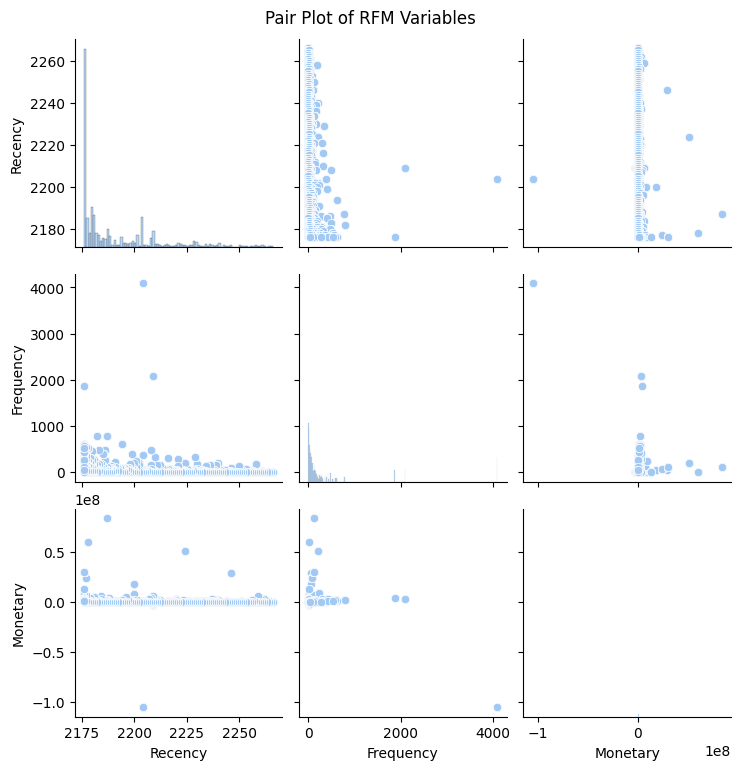

✅ Pairplot generated successfully.

Generating heatmap...


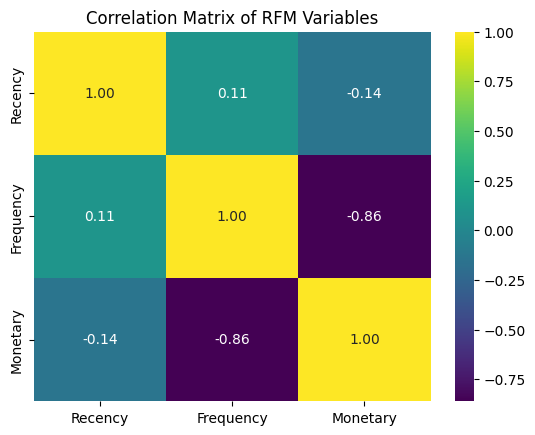

✅ Heatmap generated successfully.

Generating histograms...


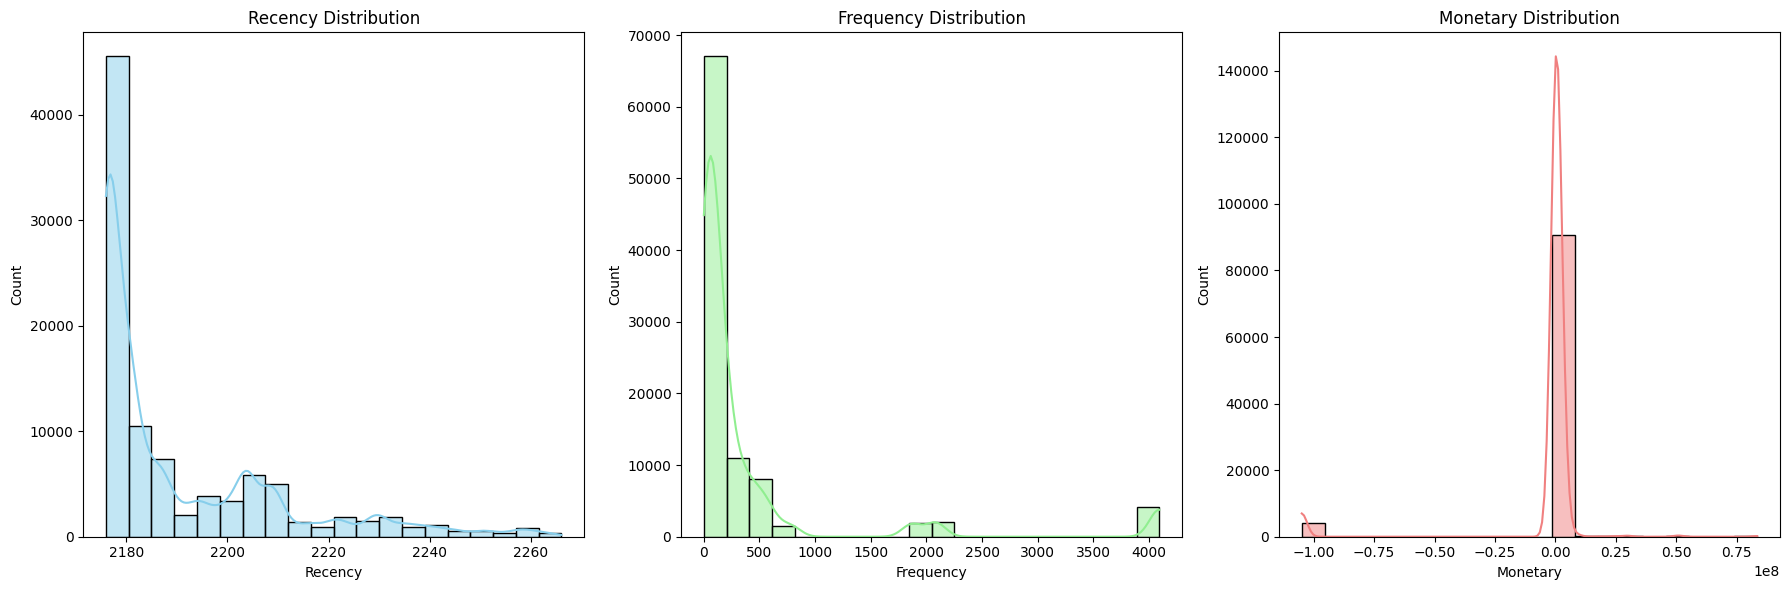

✅ Histograms generated successfully.

✅ All visualizations completed. ✅


In [12]:
# Define a function to call and organize RFMS visualizations
def visualize_rfm_data(rfm):
    """
    Function to visualize RFM data comprehensively.

    Parameters:
    - rfm (CreditScoreRFM): The CreditScoreRFM object containing RFM data and visualization methods.

    Visualizations:
    1. Pairplot: Displays relationships between 'Recency', 'Frequency', 'Monetary', and 'Risk_Level'.
    2. Heatmap: Provides a correlation matrix for the dataset.
    3. Histograms: Shows the distribution of RFM metrics.
    """
    print("🟢 Starting RFM visualizations...")
    print("===========================================")
    try:
        print("Generating pairplot...")
        rfm.plot_pairplot()  # Plot relationships between R, F, M, and risk level
        print("✅ Pairplot generated successfully.\n")
        print("===========================================")

        print("Generating heatmap...")
        rfm.plot_heatmap()  # Plot heatmap for correlations
        print("✅ Heatmap generated successfully.\n")
        print("===========================================")

        print("Generating histograms...")
        rfm.plot_histograms()  # Plot distributions of metrics
        print("✅ Histograms generated successfully.\n")
        print("===========================================")

        print("✅ All visualizations completed. ✅")
        print("===========================================")
    except AttributeError as e:
        print(
            f"AttributeError: {e}. Ensure that 'Recency', 'Frequency', 'Monetary', and 'Risk_Level' are defined in rfms_df."
        )
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# Call the function to visualize the data
visualize_rfm_data(rfm)


### **Calculate RFM score and assign bad or good labels**

In [13]:
# Calculate RFM scores
rfm_df_scores = rfm.calculate_rfm_scores(rfm_df)

# Assign labels
rfm_df_scores = rfm.assign_label(rfm_df_scores)

# Display the updated RFM DataFrame with required columns
rfm_df_scores[['CustomerId', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Risk_Label']].head(20)


,CustomerId,Recency,Frequency,Monetary,RFM_Score,Risk_Label
0,CustomerId_4406,2177,119,109921.75,4.00,Good
2,CustomerId_4683,2257,2,1000.00,1.00,Bad
3,CustomerId_988,2181,38,228727.20,4.00,Good
5,CustomerId_1432,2266,1,2000.00,1.00,Bad
6,CustomerId_2858,2181,29,93400.00,4.00,Good
8,CustomerId_598,2264,4,8060.00,1.90,Bad
9,CustomerId_1053,2265,7,13788.00,1.90,Bad
10,CustomerId_3052,2237,12,10700.00,2.35,Good
16,CustomerId_3105,2176,199,159548.00,4.00,Good
19,CustomerId_3507,2216,11,6350.00,2.45,Good


### **Visualize the distribution of risk labels**

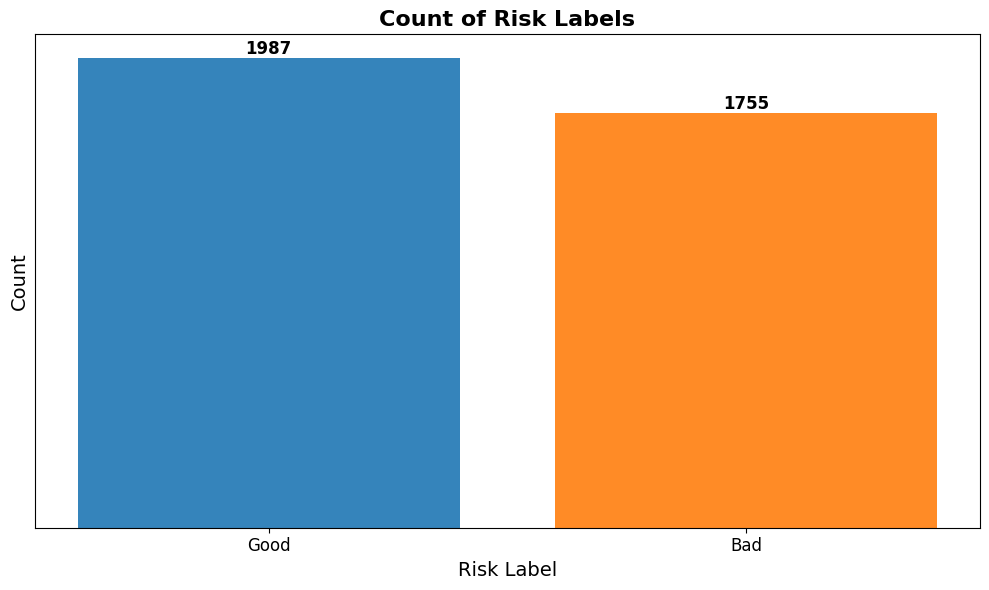

In [14]:
import matplotlib.pyplot as plt

# Count the occurrences of each risk label
risk_counts = rfm_df['Risk_Label'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e']  

bars = plt.bar(risk_counts.index, risk_counts.values, color=colors, alpha=0.9)

# Add count labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Set title and labels with improved font sizes
plt.title('Count of Risk Labels', fontsize=16, fontweight='bold')
plt.xlabel('Risk Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # Rotate x-axis labels for better readability

# Remove Y-axis values
plt.yticks([])

# Show the grid and clean layout
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dashed grid for a cleaner look
plt.tight_layout()  # Adjust layout for better spacing

# Show the plot
plt.show()

### **Perform Weight of Evidence (WoE) binning**

In [15]:
# Step 1: Create RFMS bins with unique edges
# This divides the RFM_Score into 5 quantile bins and assigns a bin number to each entry in the DataFrame.
rfm_df['RFM_bin'] = pd.qcut(rfm_df['RFM_Score'], 5, labels=False, duplicates='drop')
print("RFM bins created.")
print("=====================================================")
print("Here are the first few entries:")
rfm_df[['RFM_Score', 'RFM_bin']].head()

RFM bins created.
Here are the first few entries:


,RFM_Score,RFM_bin
0,4.0,4
2,1.0,0
3,4.0,4
5,1.0,0
6,4.0,4


In [16]:
# Step 2: Calculate good and bad counts
# This calculates the number of 'Good' and 'Bad' customers in each RFM bin.
good_count, bad_count = rfm.calculate_counts(rfm_df)
print("Good and Bad counts calculated for each RFM bin:")
print("===============================")
print(f"Good counts: {good_count}")
print("===============================")
print(f"Bad counts: {bad_count}")


Good and Bad counts calculated for each RFM bin:
Good counts: RFM_bin
0      0
1      0
2    525
3    823
4    639
Name: Risk_Label, dtype: int64
Bad counts: RFM_bin
0    784
1    857
2    114
3      0
4      0
Name: Risk_Label, dtype: int64


In [17]:
# Step 3: Calculate WoE values
# This computes the Weight of Evidence (WoE) for each RFM bin based on good and bad counts.
woe_values = rfm.calculate_woe(good_count, bad_count)
print("WoE values calculated for each RFM bin:")
print(woe_values)

# Create a mapping Series from the WoE values
# Mapping the WoE values to their corresponding RFM bins.
woe_mapping = pd.Series(woe_values, index=good_count.index)

WoE values calculated for each RFM bin:
RFM_bin
0   -22.220036
1   -22.309065
2     1.403043
3    22.144426
4    21.891374
Name: Risk_Label, dtype: float64


In [18]:
# Map WoE values back to the original DataFrame
# This adds a new column 'RFM_woe' to the DataFrame which contains the WoE for each customer based on their RFM bin.
rfm_df['RFM_woe'] = rfm_df['RFM_bin'].map(woe_mapping)
print("WoE values mapped back to the original DataFrame.")
print("==========================================================")
print("Here are the first few entries of the updated DataFrame:")
rfm_df[['RFM_bin', 'RFM_woe']].head()

WoE values mapped back to the original DataFrame.
Here are the first few entries of the updated DataFrame:


,RFM_bin,RFM_woe
0,4,21.891374
2,0,-22.220036
3,4,21.891374
5,0,-22.220036
6,4,21.891374


In [19]:
# Display the updated DataFrame
rfm_df[['RFM_Score', 'RFM_bin', 'Risk_Label', 'RFM_woe']].head(15)

,RFM_Score,RFM_bin,Risk_Label,RFM_woe
0,4.00,4,Good,21.891374
2,1.00,0,Bad,-22.220036
3,4.00,4,Good,21.891374
5,1.00,0,Bad,-22.220036
6,4.00,4,Good,21.891374
8,1.90,1,Bad,-22.309065
9,1.90,1,Bad,-22.309065
10,2.35,2,Good,1.403043
16,4.00,4,Good,21.891374
19,2.45,2,Good,1.403043


### **Visualize the result**

In [20]:
# Calculate the probability of bad loans
bad_probability = bad_count / (good_count + bad_count)

print("✅ Bad probability calculated successfully.")

✅ Bad probability calculated successfully.


In [21]:
# Prepare the DataFrame for plotting
plot_data = pd.DataFrame({
    'RFM_bin': good_count.index,
    'Good_Count': good_count.values,
    'Bad_Count': bad_count.values,
    'Bad_Probability': bad_probability.values,
    'RFM_woe': rfm_df.groupby('RFM_bin')['RFM_woe'].first().values
})

print("✅ DataFrame for plotting prepared successfully.")

✅ DataFrame for plotting prepared successfully.


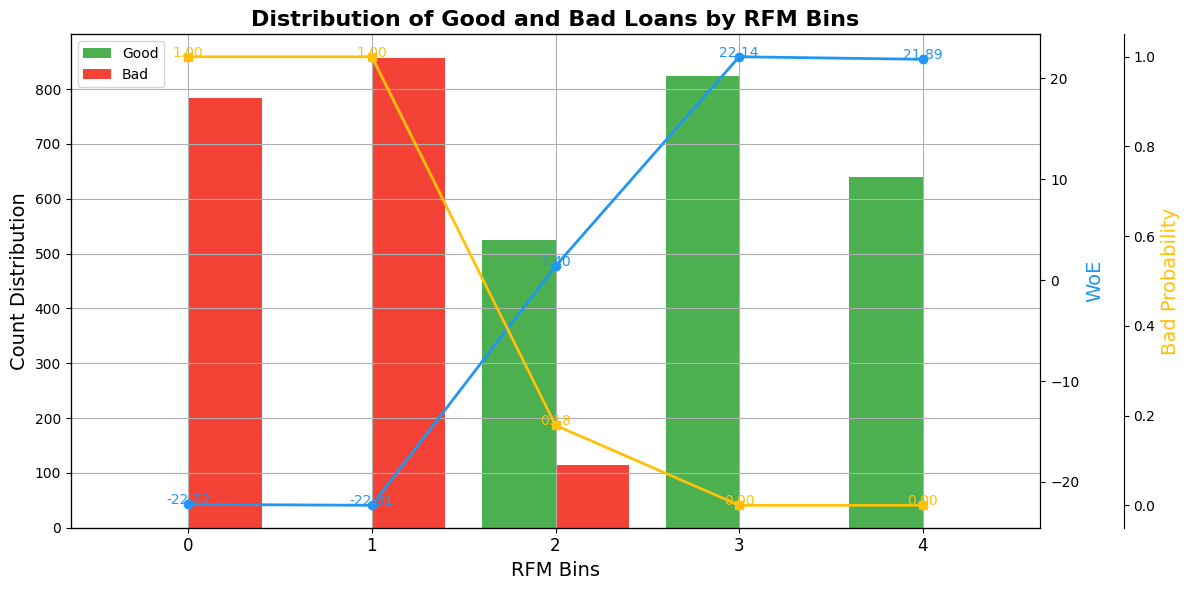

✅ Plot displayed successfully.


In [22]:
# Step 4: Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Good and Bad Counts
bar_width = 0.4
index = plot_data['RFM_bin']

# Create bar plots for Good and Bad counts with professional colors
bar1 = ax1.bar(index - bar_width/2, plot_data['Good_Count'], width=bar_width, label='Good', color='#4CAF50')  # Green
bar2 = ax1.bar(index + bar_width/2, plot_data['Bad_Count'], width=bar_width, label='Bad', color='#F44336')   # Red

ax1.set_xlabel('RFM Bins', fontsize=14)
ax1.set_ylabel('Count Distribution', fontsize=14)
ax1.set_title('Distribution of Good and Bad Loans by RFM Bins', fontsize=16, fontweight='bold')
ax1.legend(loc='upper left')

# Adding WoE line with professional color
ax2 = ax1.twinx()
ax2.plot(index, plot_data['RFM_woe'], color='#2196F3', marker='o', label='WoE', linewidth=2)  # Blue
ax2.set_ylabel('WoE', color='#2196F3', fontsize=14)

# Annotate WoE values on the line
for i, woe in enumerate(plot_data['RFM_woe']):
    ax2.text(index[i], woe, f'{woe:.2f}', color='#2196F3', ha='center', fontsize=10)

# Adding Bad Probability with professional color
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis outwards
ax3.plot(index, plot_data['Bad_Probability'], color='#FFC107', marker='s', label='Bad Probability', linewidth=2)  # Amber
ax3.set_ylabel('Bad Probability', color='#FFC107', fontsize=14)

# Annotate Bad Probability values on the line
for i, prob in enumerate(plot_data['Bad_Probability']):
    ax3.text(index[i], prob, f'{prob:.2f}', color='#FFC107', ha='center', fontsize=10)

# Show grid and finalize the plot
ax1.grid(True)
ax1.set_xticks(index)
ax1.set_xticklabels(plot_data['RFM_bin'], fontsize=12)
plt.tight_layout()
plt.show()

print("✅ Plot displayed successfully.")

# **Modelling**

### **Prepare the Data**
+ Combine all datasets to enhance predictive power and insights.

In [23]:
# Merge the DataFrames
# Create a mapping dictionary
risk_label_mapping = {'Good': 1, 'Bad': 0}

# Convert Risk_Label to binary values
rfm_df['Risk_Label'] = rfm_df['Risk_Label'].map(risk_label_mapping)

rfm_data = rfm_df[['CustomerId','Recency', 'Frequency', 'Monetary', 'Risk_Label']]
# Extract unique rows
df_normalized_unique = df_normalized.drop_duplicates(subset='CustomerId', keep='first')
features = pd.merge(df_normalized_unique, rfm_data, on='CustomerId', how='left')

# Set the CustomerId to index
features.set_index('CustomerId', inplace=True)

# Drop the irrelevant features
features.drop(columns=['TransactionStartTime'], inplace=True)

target = rfm_df['Risk_Label']

In [24]:
features.head(10)

,ProductCategory,ChannelId,Amount,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Recency,Frequency,Monetary,Risk_Label
CustomerId,,,,,,,,,,,,,,,,,
CustomerId_4406,-0.799047,0.746738,1000.0,-0.349252,0.0,0.170118,-0.067623,-0.311831,-0.168551,-2.155530,-0.100739,0.848684,-0.994246,2177,119,109921.75,1
CustomerId_4683,-0.799047,0.746738,500.0,-0.349252,0.0,0.165122,-0.072568,-0.444993,-0.202748,-2.155530,-0.100739,0.848684,-0.994246,2257,2,1000.00,0
CustomerId_988,4.361398,0.746738,20000.0,-0.349252,0.0,0.175567,-0.008155,-0.404020,-0.009754,-1.949214,-0.100739,0.848684,-0.994246,2181,38,228727.20,1
CustomerId_1432,-0.799047,0.746738,2000.0,-0.349252,0.0,0.165168,-0.055062,-0.446132,0.000000,-1.949214,-0.100739,0.848684,-0.994246,2266,1,2000.00,0
CustomerId_2858,-0.799047,0.746738,10000.0,2.379557,0.0,0.169360,-0.040815,-0.414264,-0.140992,-1.949214,-0.100739,0.848684,-0.994246,2181,29,93400.00,1
CustomerId_598,-0.799047,0.746738,500.0,-0.349252,0.0,0.165446,-0.054887,-0.442717,-0.165175,-1.742898,-0.100739,0.848684,-0.994246,2264,4,8060.00,0
CustomerId_1053,0.491064,0.746738,600.0,-0.349252,0.0,0.165709,-0.055415,-0.439303,-0.181262,-1.742898,-0.100739,0.848684,-0.994246,2265,7,13788.00,0
CustomerId_3052,-0.799047,0.746738,890.0,-0.349252,0.0,0.165567,-0.067997,-0.433612,-0.194972,-1.742898,-0.100739,0.848684,-0.994246,2237,12,10700.00,1
CustomerId_3105,0.491064,0.746738,500.0,-0.349252,0.0,0.172394,-0.069046,-0.220780,-0.194733,-1.742898,-0.100739,0.848684,-0.994246,2176,199,159548.00,1


**Correlation analysis to select the best features**

In [25]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = features.corr()

# Get the correlation values for the target column
corr_with_target = correlation_matrix['Risk_Label'].abs()


# Select features that have correlation above the threshold (excluding the target column itself)
selected_features = corr_with_target[corr_with_target > 0.1].index.tolist()
selected_features.remove('Risk_Label')  # Exclude the target column itself

# Return the DataFrame with only the selected features
features = features[selected_features]

In [26]:
corr_with_target.sort_values(ascending=False).reset_index(name='Correlation with Risk_Label')

,index,Correlation with Risk_Label
0,Risk_Label,1.000000
1,Recency,0.353833
2,Transaction_Count,0.217522
3,Frequency,0.217522
4,Transaction_Year,0.154506
5,Transaction_Month,0.140093
6,ProductCategory,0.130532
7,PricingStrategy,0.108829
8,Transaction_Day,0.093316
9,Amount,0.088088


In [27]:
features.columns

Index(['ProductCategory', 'PricingStrategy', 'Transaction_Count',
       'Transaction_Month', 'Transaction_Year', 'Recency', 'Frequency'],
      dtype='object')

Based on the above correlation results:

Feature Selection:

+ Focus on the features with high correlations for modeling:
+ High Correlation
+ Moderate Correlation Selected features based on the threshold of 0.1 including negative correlation


In [28]:
# Separate target and feature variables
X = features
y = target
# Print the shapes of the separated variables
print("Separated features (X) with shape:", X.shape)
print("Separated target (y) with shape:", y.shape)

Separated features (X) with shape: (3742, 7)
Separated target (y) with shape: (3742,)


In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

### **Split the data into train and validation set**

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Check for NaN values in the target variable
if y.isnull().any():
    print("NaN values found in the target variable. Handling NaN values...")

    # Option 1: Drop NaN values
    # Combine features and target for dropping NaNs
    data = pd.concat([X, y], axis=1)
    data = data.dropna()
    
    # Separate features and target again
    X = data.drop(columns=[y.name])  # Replace y.name with the actual name of your target variable if necessary
    y = data[y.name]  # Replace y.name with the actual name of your target variable if necessary

    print("NaN values dropped. New shapes:")
    print("Features (X) shape:", X.shape)
    print("Target (y) shape:", y.shape)

    # Option 2: Fill NaN values (if needed)
    # y.fillna(y.median(), inplace=True)  # Example: Fill with median
    # print("NaN values filled.")

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train and test sets created:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Train and test sets created:
X_train shape: (2993, 7)
X_test shape: (749, 7)
y_train shape: (2993,)
y_test shape: (749,)


In [45]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the shapes of the original and resampled datasets
print("Original training data shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("\nResampled training data shapes:")
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

# Now use X_resampled and y_resampled for training your model

Original training data shapes:
X_train shape: (2993, 7)
y_train shape: (2993,)

Resampled training data shapes:
X_resampled shape: (3178, 7)
y_resampled shape: (3178,)


**Create a Pipeline**

In [32]:
# Define models
print("Defining models...")
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}
print("Models defined:", list(models.keys()))

# Define hyperparameter grids for each model
print("\nDefining hyperparameter grids...")
param_grids = {
    'Logistic Regression': {'classifier__C': [0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'classifier__max_depth': [3, 5, 7, None]},
    'Random Forest': {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 5, 10]},
    'Gradient Boosting': {'classifier__learning_rate': [0.01, 0.1, 0.2], 'classifier__n_estimators': [50, 100, 200]}
}
print("Hyperparameter grids defined for each model.")

# Define pipelines
print("\nCreating pipelines for each model...")
pipelines = {name: Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('classifier', model)  # The model to be trained
]) for name, model in models.items()}
print("Pipelines created.")

# Set up GridSearchCV for each model pipeline
print("\nSetting up GridSearchCV for each model...")
grid_searches = {
    name: GridSearchCV(estimator=pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy')
    for name, pipeline in pipelines.items()
}
print("GridSearchCV set up for each model pipeline.")

Defining models...
Models defined: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

Defining hyperparameter grids...
Hyperparameter grids defined for each model.

Creating pipelines for each model...
Pipelines created.

Setting up GridSearchCV for each model...
GridSearchCV set up for each model pipeline.


### **Train the Models**

In [33]:
# Train each pipeline with the resampled dataset
print("Starting training of models with the resampled dataset...\n")
for name, grid_search in grid_searches.items():
    print(f"Training {name} model...")
    grid_search.fit(X_resampled, y_resampled)
    print(f"{name} model trained with best parameters: {grid_search.best_params_}\n")

print("All models have been trained.")

Starting training of models with the resampled dataset...

Training Logistic Regression model...


Logistic Regression model trained with best parameters: {'classifier__C': 100}

Training Decision Tree model...
Decision Tree model trained with best parameters: {'classifier__max_depth': 5}

Training Random Forest model...
Random Forest model trained with best parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 200}

Training Gradient Boosting model...
Gradient Boosting model trained with best parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}

All models have been trained.


### **Evaluate Model Performance**

In [34]:
# Initialize a dictionary to store performance metrics
performance_metrics = {}
y_probs = {}

print("Calculating performance metrics for each model...\n")

for name, pipeline in grid_searches.items():
    print(f"Evaluating {name} model...")
    
    # Predictions on the test set
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    y_probs[name] = y_prob  # Store probabilities for ROC curve

    # Calculate metrics
    performance_metrics[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    }
    
    print(f"{name} model evaluation complete. Metrics calculated:\n{performance_metrics[name]}\n")

print("All models have been evaluated.")

Calculating performance metrics for each model...

Evaluating Logistic Regression model...
Logistic Regression model evaluation complete. Metrics calculated:
{'Accuracy': 0.9025367156208278, 'Precision': 0.9577464788732394, 'Recall': 0.8542713567839196, 'F1 Score': 0.9030544488711819, 'ROC AUC': np.float64(0.9567602972125586)}

Evaluating Decision Tree model...
Decision Tree model evaluation complete. Metrics calculated:
{'Accuracy': 0.910547396528705, 'Precision': 0.9534246575342465, 'Recall': 0.8743718592964824, 'F1 Score': 0.9121887287024901, 'ROC AUC': np.float64(0.9458188377786367)}

Evaluating Random Forest model...
Random Forest model evaluation complete. Metrics calculated:
{'Accuracy': 0.9052069425901201, 'Precision': 0.957983193277311, 'Recall': 0.8592964824120602, 'F1 Score': 0.9059602649006623, 'ROC AUC': np.float64(0.9692049993557531)}

Evaluating Gradient Boosting model...
Gradient Boosting model evaluation complete. Metrics calculated:
{'Accuracy': 0.9145527369826435, 'P

### **Compare the Models**

In [35]:
# Create a DataFrame from the performance metrics
print("Creating a DataFrame from the performance metrics...")
performance_df = pd.DataFrame(performance_metrics).T

# Display the DataFrame
print("Performance metrics DataFrame created:\n")
performance_df

Creating a DataFrame from the performance metrics...
Performance metrics DataFrame created:



,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.902537,0.957746,0.854271,0.903054,0.956760
Decision Tree,0.910547,0.953425,0.874372,0.912189,0.945819
Random Forest,0.905207,0.957983,0.859296,0.905960,0.969205
Gradient Boosting,0.914553,0.948925,0.886935,0.916883,0.966982


### **Visualize the results**

Calculating ROC curve for Logistic Regression model...
Calculating ROC curve for Decision Tree model...
Calculating ROC curve for Random Forest model...
Calculating ROC curve for Gradient Boosting model...


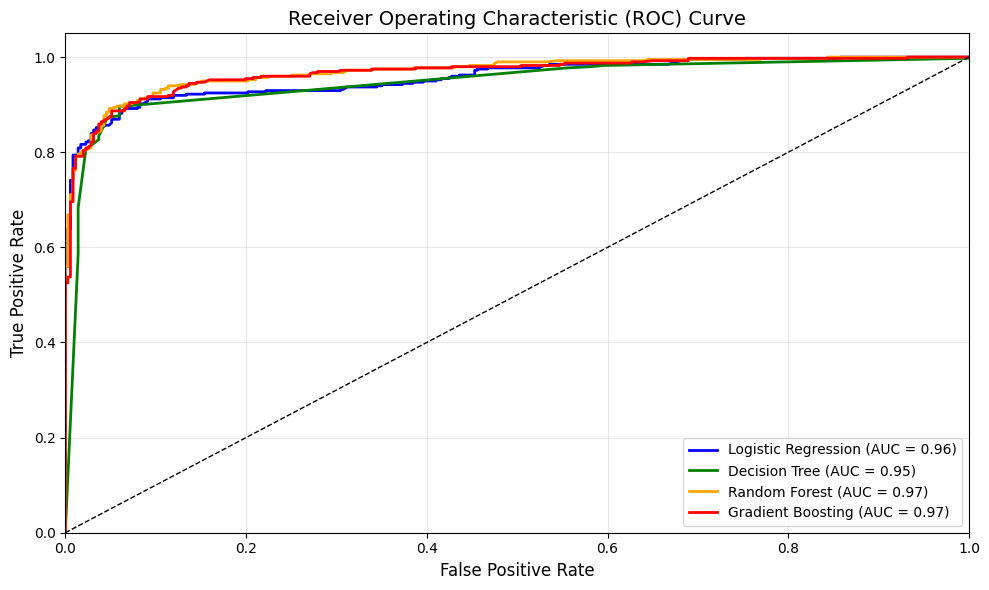

ROC curve plot displayed.


In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Set up the plot
plt.figure(figsize=(10, 6))

# Loop through each model's predicted probabilities
colors = ['blue', 'green', 'orange', 'red']  # Define colors for each model
for (model_name, probs), color in zip(y_probs.items(), colors):
    print(f"Calculating ROC curve for {model_name} model...")
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', color=color, linewidth=2)

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)  # Light grid for better visibility

# Show the plot
plt.tight_layout()
plt.show()
print("ROC curve plot displayed.")

In [37]:
print("Features used during training:", X_train.columns.tolist())


Features used during training: ['ProductCategory', 'PricingStrategy', 'Transaction_Count', 'Transaction_Month', 'Transaction_Year', 'Recency', 'Frequency']


In [38]:
# Check the type of best_estimator_ before saving
best_model = grid_search.best_estimator_
print(f"Best model type before saving: {type(best_model)}")


Best model type before saving: <class 'sklearn.pipeline.Pipeline'>


In [39]:
import joblib
from sklearn.base import BaseEstimator

# Ensure that the best model is a valid sklearn pipeline
best_model = grid_search.best_estimator_

# Check if it's a valid sklearn pipeline
if isinstance(best_model, BaseEstimator):
    model_path = '../api/model/best_models.pkl'  # Specify the path
    print(f"Saving the best model to {model_path}...")
    
    # Save the model using joblib
    joblib.dump(best_model, model_path)
    print("Best model saved successfully.")
else:
    raise TypeError(f"The best model is not a valid scikit-learn model, found type: {type(best_model)}")


Saving the best model to ../api/model/best_models.pkl...
Best model saved successfully.


In [40]:
import joblib
from sklearn.base import BaseEstimator

# Assuming 'grid_search' is your GridSearchCV object and it has been run
best_model = grid_search.best_estimator_

# Ensure that the best model is a valid sklearn model
if isinstance(best_model, BaseEstimator):
    model_path = '../api/model/best_model2.pkl'  # Specify the path
    print(f"Saving the best model to {model_path}...")
    
    # Save the model using joblib
    joblib.dump(best_model, model_path)
    print("Best model saved successfully.")
else:
    raise TypeError("The best model is not a valid scikit-learn model")


Saving the best model to ../api/model/best_model2.pkl...
Best model saved successfully.


In [41]:
import joblib

# Assuming 'grid_search' is your GridSearchCV object and it has been run
best_model = grid_search.best_estimator_

# Save the best model to a file
model_path = '../api/model/best_model.pkl'  # Specify the path
print(f"Saving the best model to {model_path}...")
joblib.dump(best_model, model_path)
print("Best model saved successfully.")

Saving the best model to ../api/model/best_model.pkl...
Best model saved successfully.


In [42]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', GradientBoostingClassifier(n_estimators=200))])